In [1]:
from linares_plot import *
from missdirection_model import *
%load_ext autoreload
%autoreload



In [7]:
n_simulations =50
numcores = multiprocessing.cpu_count() - 1

### Standard

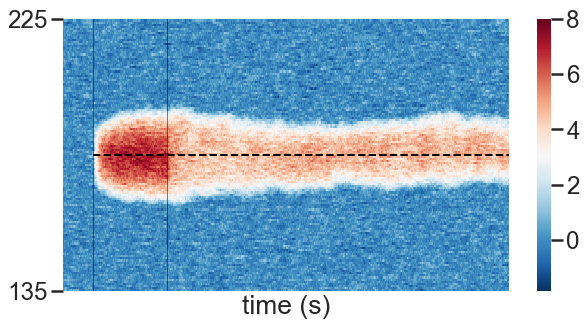

4.300404816058091

In [213]:
an = model(totalTime=1500, targ_onset=100, angle_target_i=180, presentation_period=250, angle_separation=22, tauE=9, tauI=4,  n_stims=1, 
     I0E=0.1, I0I=0.5, GEE=0.025, GEI=0.019, GIE=0.01 , GII=0.1, sigE=1.1, sigI=1.9, kappa_E=300, kappa_I=30, 
     kappa_stim=75, N=512, plot_connectivity=False, plot_rate=False, plot_hm=True , plot_fit=False) 

abs_180_bias = an[0] ## 180-decode_rE(RE) measured that way
abs_180_bias

### Direction

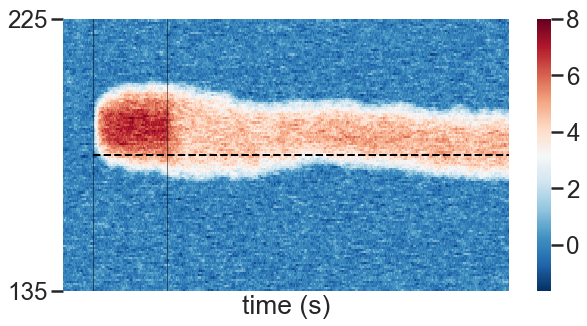

6.479592916193695 True


In [174]:
an = model(totalTime=1500, targ_onset=100, angle_target_i=190, presentation_period=250, angle_separation=30, tauE=9, tauI=4,  n_stims=1, 
     I0E=0.1, I0I=0.5, GEE=0.025, GEI=0.019, GIE=0.01 , GII=0.1, sigE=1.1, sigI=1.9, kappa_E=300, kappa_I=30, 
     kappa_stim=75, N=512, plot_connectivity=False, plot_rate=False, plot_hm=True , plot_fit=False) 

abs_180_bias = an[0] ## 180-decode_rE(RE) measured that way
active = an[2]
print(abs_180_bias, active)

In [8]:
results = Parallel(n_jobs = numcores)(delayed(model)(totalTime=1500, targ_onset=100, angle_target_i=195, presentation_period=250, angle_separation=30, tauE=9, 
               tauI=4,  n_stims=1, I0E=0.1, I0I=0.5, GEE=0.025, GEI=0.019, GIE=0.01 , GII=0.1, sigE=1.1, sigI=1.9, 
               kappa_E=300, kappa_I=30, kappa_stim=75, N=512, plot_connectivity=False, plot_rate=False, 
               plot_hm=False , plot_fit=False) for i in range(0,n_simulations)) 


bias_direction = [results[i][0] for i in range(len(results))]
active_direction = [results[i][2] for i in range(len(results))]

In [9]:
print( 'Mean abs bias: ' +str(np.round(np.mean(bias_direction),2)) + ', detected: ' +str(np.sum(active_direction)*100/n_simulations ) + '%' )


Mean abs bias: 18.26, detected: 8.0%


angle_target_i=190 : 62%  
angle_target_i=200: 0%  
angle_target_i=195: 8%  

### Diminishment

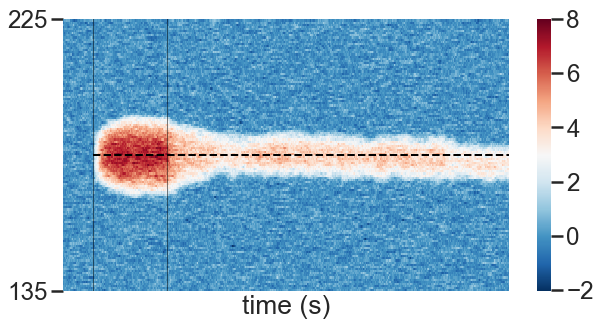

10.467915940822365 True


In [175]:
an = model(totalTime=1500, targ_onset=100, angle_target_i=180, presentation_period=250, angle_separation=22, tauE=9, tauI=4, 
           n_stims=1, I0E=-0.24, I0I=0.5, GEE=0.025, GEI=0.019, GIE=0.01 , GII=0.1, sigE=1.1, sigI=1.9, kappa_E=300, kappa_I=30, 
           kappa_stim=75, N=512, plot_connectivity=False, plot_rate=False, plot_hm=True , plot_fit=False) 

abs_180_bias = an[0] ## 180-decode_rE(RE) measured that way
active = an[2]
print(abs_180_bias, active)

In [ ]:
results = Parallel(n_jobs = numcores)(delayed(model)(totalTime=1500, targ_onset=100, angle_target_i=180, presentation_period=250, angle_separation=22, tauE=9, tauI=4, 
               n_stims=1, I0E=-0.25, I0I=0.5, GEE=0.025, GEI=0.019, GIE=0.01 , GII=0.1, sigE=1.1, sigI=1.9, kappa_E=300, kappa_I=30, 
               kappa_stim=75, N=512, plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False) for i in range(0,n_simulations)) 


bias_diminish = [results[i][0] for i in range(len(results))]
active_diminish = [results[i][2] for i in range(len(results))]

In [ ]:
print( 'Mean abs bias: ' +str(np.round(np.mean(bias_diminish),2)) + ', detected: ' +str(np.sum(active_diminish)*100/n_simulations ) + '%' )


I0E= = -0.24 : 28%  
I0E = -0.23 : detected 63%  
I0E= -0.22: detected 70%  
I0E = -0.21: detected 84%  
I0E = -0.20: detected 88%  

### Division

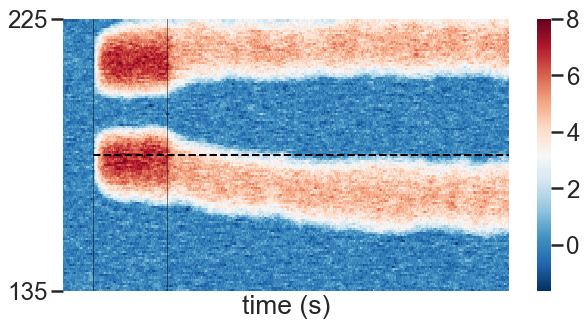

13.833223118798344 False 2


In [187]:
an = model(totalTime=1500, targ_onset=100, angle_target_i=180, presentation_period=250, angle_separation=30, tauE=9, tauI=4, 
           n_stims=2, I0E=0.1, I0I=0.5, GEE=0.025, GEI=0.019, GIE=0.01 , GII=0.1, sigE=1.1, sigI=1.9, kappa_E=300, kappa_I=30,
           kappa_stim=75, N=512, plot_connectivity=False, plot_rate=False, plot_hm=True , plot_fit=False) 

abs_180_bias = an[0] ## 180-decode_rE(RE) measured that way
active = an[2]
n_bumps=an[8]
print(abs_180_bias, active, n_bumps)

In [18]:
results = Parallel(n_jobs = numcores)(delayed(model)(totalTime=1500, targ_onset=100, angle_target_i=180, 
                                                     presentation_period=250, angle_separation=40, tauE=9, tauI=4, 
                                                     n_stims=2, I0E=0.1, I0I=0.5, GEE=0.025, GEI=0.019, GIE=0.01 , 
                                                     GII=0.1, sigE=1.1, sigI=1.9, kappa_E=300, kappa_I=30, 
                                                     kappa_stim=75, N=512, plot_connectivity=False, plot_rate=False, 
                                                     plot_hm=True , plot_fit=False) for i in range(0,n_simulations)) 


bias_division = [results[i][0] for i in range(len(results))]
active_division = [results[i][2] for i in range(len(results))]
number_bumps = [results[i][8] for i in range(len(results))]

In [19]:
print( 'Mean abs bias: ' +str(np.round(np.mean(bias_division),2)) + ', detected: ' +str(np.sum(active_division)*100/n_simulations ) + '%' )


Mean abs bias: 16.28, detected: 72.0%


In [ ]:
# #Hundred simulations alternative in a loop (much slower)
# bias_division=[]
# active_division=[]
# number_bumps=[]

# for n in range(n_simulations):
#     an = model(totalTime=1500, targ_onset=100, angle_target_i=180, presentation_period=250, angle_separation=30, tauE=9, tauI=4, 
#                n_stims=2, I0E=0.1, I0I=0.5, GEE=0.025, GEI=0.019, GIE=0.01 , GII=0.1, sigE=1.1, sigI=1.9, kappa_E=300, kappa_I=30,
#                kappa_stim=75, N=512, plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False) 
    
#     abs_180_bias = an[0] ## 180-decode_rE(RE) measured that way
#     active = an[2]
#     n_bumps=an[8]
#     bias_division.append(abs_180_bias)
#     active_division.append(active)
#     number_bumps.append(n_bumps)
    
#     #print(abs_180_bias, active)